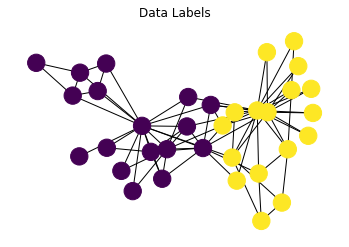

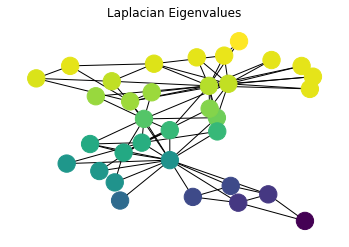

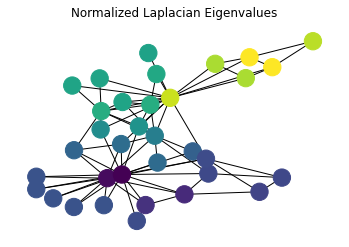

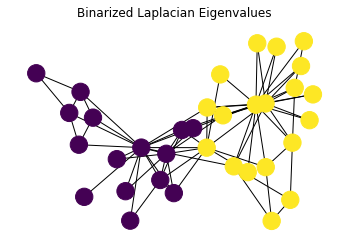

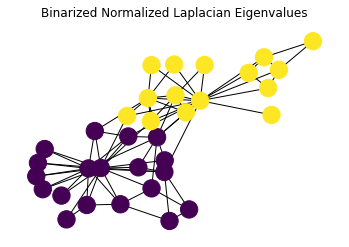

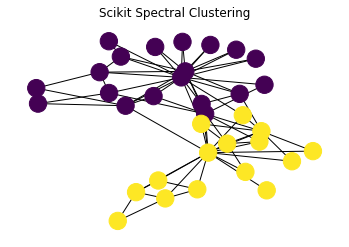

In [1]:
import networkx as nx
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn import metrics

G = nx.karate_club_graph()
AM = nx.adjacency_matrix(G)
NLM = (nx.normalized_laplacian_matrix(G)).todense()
LM = (nx.laplacian_matrix(G)).todense()

Labels = [G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes()]


plt.figure()
plt.title("Data Labels")
nx.draw(G, node_color=Labels )
plt.show()

NLMva, NLMve = LA.eigh(NLM)

LMva, LMve = LA.eigh(LM)

Fv = LMve[:,1]
xFv = [Fv.item(x) for x in range(34)]
NFv = NLMve[:,1]
xNFv = [NFv.item(x) for x in range(34)]

plt.figure()
plt.title("Laplacian Eigenvalues")
nx.draw(G, node_color=xFv )
plt.show()

plt.figure()
plt.title("Normalized Laplacian Eigenvalues")
nx.draw(G,node_color= xNFv)
plt.show()

plt.figure()
plt.title("Binarized Laplacian Eigenvalues")
nx.draw(G, node_color=[xFv[x] > 0 for x in range(34)] )
plt.show()

plt.figure()
plt.title("Binarized Normalized Laplacian Eigenvalues")
nx.draw(G,node_color= [xNFv[x] > 0 for x in range(34)])
plt.show()


sc = SpectralClustering(2, affinity='precomputed', assign_labels='discretize')

sc.fit(AM)

plt.figure()
plt.title("Scikit Spectral Clustering")
nx.draw(G,node_color= sc.labels_)
plt.show()














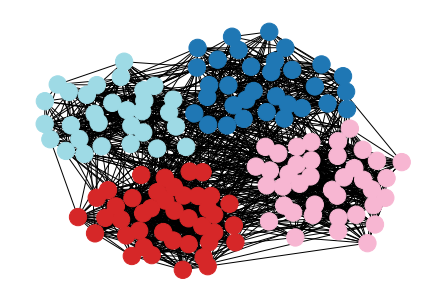

In [2]:
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg as LA
import numpy as np

sizes = [30,32,41,39]

probs = [[.5,.05,.05,.05],[.05,.5,.05,.05],[.05,.05,.5,.05],[.05,.05,.05,.5]]

G = nx.stochastic_block_model(sizes, probs)



LM = (nx.laplacian_matrix(G)).todense()

LMva, LMve = LA.eigh(LM)

k=4

X = LMve[:,0:k]


kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

plt.figure()
nx.draw(G, node_color = kmeans.labels_, cmap = 'tab20')
plt.show()
